In [10]:
import pandas as pan
import numpy as np
import matplotlib.pyplot as plotter
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV

In [2]:
matrix_data = pan.read_csv("data_banknote_authentication.csv")

In [3]:
matrix_data.head(3)

,Variance_Wavelet,Skewness_Wavelet,Curtosis_Wavelet,Image_Entropy,Class
0,3.6216,8.6661,-2.8073,-0.44699,0
1,4.5459,8.1674,-2.4586,-1.46210,0
2,3.8660,-2.6383,1.9242,0.10645,0


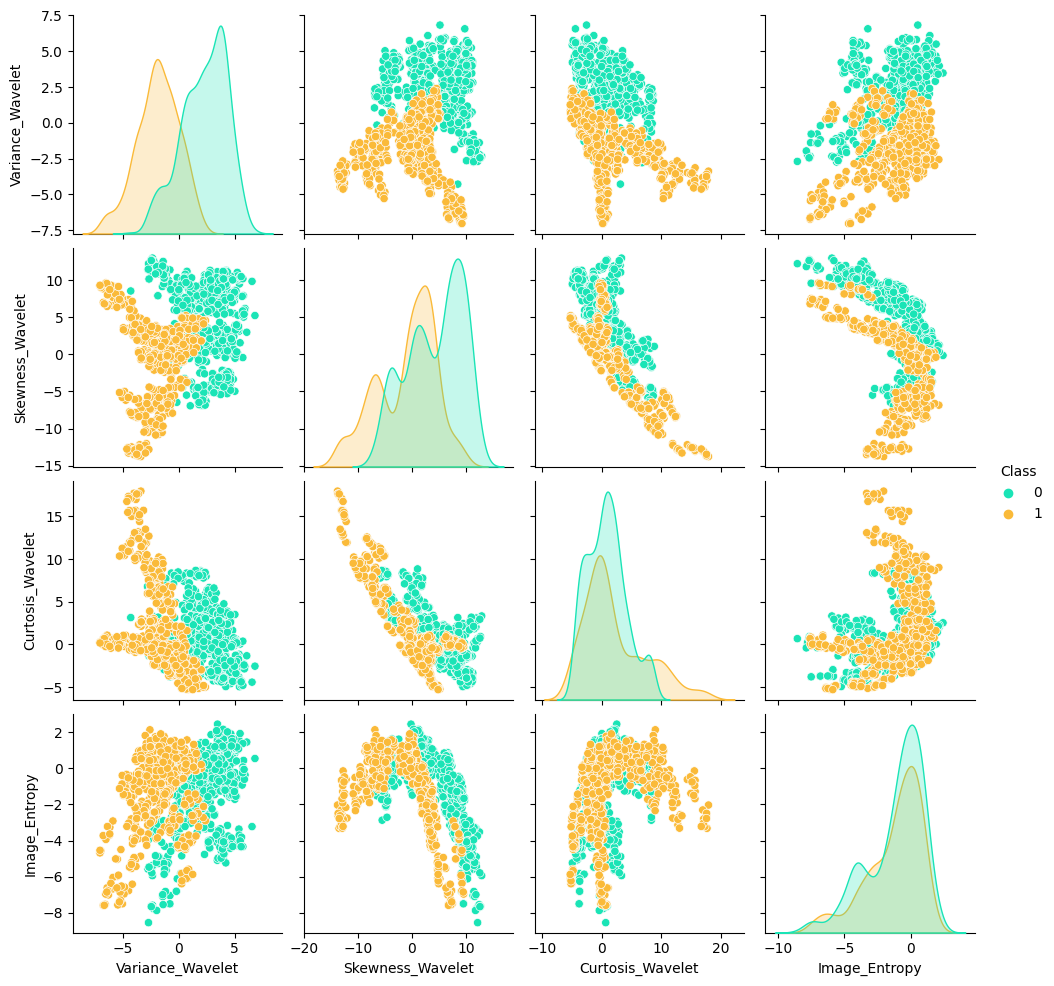

In [7]:
#visualizing the relationships between the features and the label
sns.pairplot(matrix_data, hue = "Class", palette = "turbo")

In [9]:
features = matrix_data.drop("Class", axis = 1)
label = matrix_data["Class"]

In [21]:
#train_test_split
feature_train, feature_test, label_train, label_test = train_test_split(features, label, test_size = 0.15, random_state = 42)

In [22]:
forest_subgridder = RandomForestClassifier()
param_grid = {"n_estimators": list(range(60, 160)), "bootstrap": [True, False], "max_features": [1, 2, "sqrt", "log2"], "oob_score": [True, False]}
gridder = GridSearchCV(forest_subgridder, param_grid, verbose = 1, cv = 7, n_jobs = 3)

In [23]:
gridder.fit(feature_train, label_train)

Fitting 7 folds for each of 1600 candidates, totalling 11200 fits


C:\Users\omoke\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
2800 fits failed out of a total of 11200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2800 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\omoke\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\omoke\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_forest.py", line 434, in fit
    raise ValueError("Out of bag estimation only available if bootstrap=True")
ValueError: Out of bag estimation only available if bootstrap=True

 

GridSearchCV(cv=7, estimator=RandomForestClassifier(), n_jobs=3,
             param_grid={'bootstrap': [True, False],
                         'max_features': [1, 2, 'sqrt', 'log2'],
                         'n_estimators': [60, 61, 62, 63, 64, 65, 66, 67, 68,
                                          69, 70, 71, 72, 73, 74, 75, 76, 77,
                                          78, 79, 80, 81, 82, 83, 84, 85, 86,
                                          87, 88, 89, ...],
                         'oob_score': [True, False]},
             verbose=1)

In [25]:
predictions = gridder.predict(feature_test)

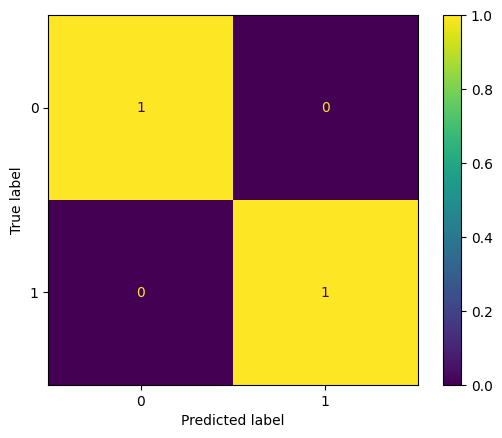

In [26]:
ConfusionMatrixDisplay.from_predictions(label_test, predictions, normalize = "true")

In [27]:
print(classification_report(label_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       111
           1       1.00      1.00      1.00        95

    accuracy                           1.00       206
   macro avg       1.00      1.00      1.00       206
weighted avg       1.00      1.00      1.00       206



In [28]:
gridder.best_params_

{'bootstrap': False, 'max_features': 1, 'n_estimators': 65, 'oob_score': False}